# Thapar Summer School 2024 Competition 3: Binary Classification

## Objective:
### Prediction of the probability whether a person is a smoker based on given features in the dataset. 
### Evaluations are on the basis of the ROC curve (AUC-ROC).

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tss24-competition-3/sample_submission.csv
/kaggle/input/tss24-competition-3/train.csv
/kaggle/input/tss24-competition-3/test.csv


## Exploration and Visualization 

In [2]:
train = pd.read_csv("/kaggle/input/tss24-competition-3/train.csv")
test = pd.read_csv("/kaggle/input/tss24-competition-3/test.csv")

In [3]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
train.shape

(159256, 24)

In [5]:
train.dtypes

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [6]:
train.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

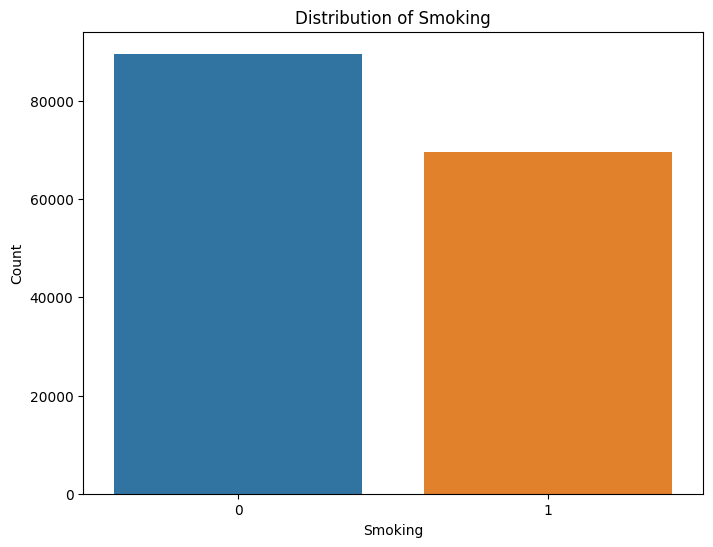

In [7]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'smoking', data = train)

plt.title('Distribution of Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

## Preprocessing

In [8]:
X = train.drop(['id', 'smoking'], axis = 1)
Y = train['smoking']

In [9]:
numericalColumnsX = X.select_dtypes(include = ['float64', 'int64']).columns
numericalColumnY = test.select_dtypes(include = ['float64', 'int64']).columns

Scaler = StandardScaler()
X[numericalColumnsX] = Scaler.fit_transform(X[numericalColumnsX])
X_test = test.drop('id', axis = 1)
X_test = Scaler.transform(X_test)

## Defining and training our model

In [10]:
model = LogisticRegression(random_state = 42)
model.fit(X, Y)

LogisticRegression(random_state=42)

In [11]:
Predictions = model.predict_proba(X_test)[:, 1]

Submission = pd.DataFrame({
    'id' : test['id'], 
    'smoking' : Predictions
})

Submission.to_csv('Submission.csv', index = False)
print("Submission file created successfully.")

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Submission file created successfully.
